<a href="https://colab.research.google.com/github/Anatoly333/Cats_leukemia_ML/blob/main/Cats_leukemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Библиотека для работы с матрицами
import numpy as np 
# Алгоритмы линейной алгебры
import scipy.linalg as sla
import math
import pandas as pd
import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import svm 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from matplotlib import pyplot

In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 5.3 MB/s 


In [ ]:
import shap

AxesSubplot(0.125,0.125;0.62x0.755)
                                        Гематокрит (Hct,PCV)  ...  Болен или нет
Гематокрит (Hct,PCV)                                1.000000  ...      -0.617393
Гемоглобин (Hgb)                                    0.992286  ...      -0.542039
Эритроциты (RBC)                                    0.987443  ...      -0.598072
Лейкоциты (WBC)                                     0.014635  ...       0.150165
Тромбоциты (Plt)                                    0.236083  ...      -0.396178
Ядерные эритроциты (нормобласты, nRBC)             -0.233403  ...       0.125703
Средний объем эритроцита (MCV)                     -0.507590  ...       0.269526
Палочкоядерные нейтрофилы ABS                      -0.169502  ...       0.279350
Сегментоядерные нейтрофилы ABS                     -0.075442  ...       0.097404
Моноциты ABS                                       -0.065354  ...       0.086486
Болен или нет                                      -0.617393  ...       1

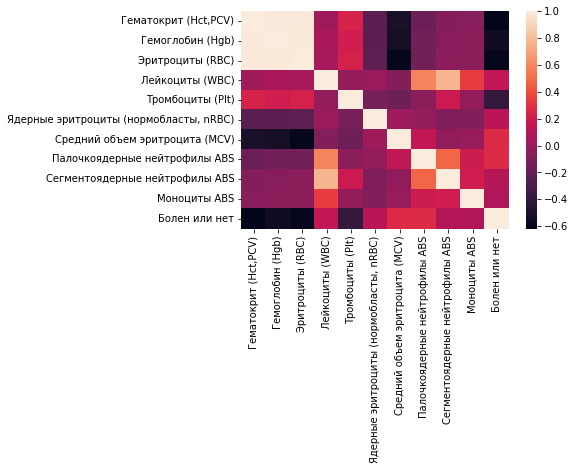

In [ ]:
import seaborn as sns
data_all_read = pd.read_excel('cats_all.xlsx')
corrMatrix = data_all_read.corr()
ax = sns.heatmap(corrMatrix)
print(ax)
print(corrMatrix)

In [ ]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

def Accurancy_pure(method, data):
  data_all_read = data
  data_all_read = pd.read_excel('cats_all.xlsx')

  schedule_step = round((data_all_read.shape[0] - 1) / 2 / 10)
  sample_size = round((data_all_read.shape[0] - 1) / 2)
  print(sample_size)
  training_score = []
  test_score = []
  help_avarage_training = []
  help_avarage_test = []
  i = 0
  x = sample_size
  scaler = StandardScaler()
  x = sample_size % 10
  for i in range(schedule_step): 
    x += 10
    for j in range(150):
      data_all = data_all_read
      data_all = shuffle(data_all)
      Y = data_all['Болен или нет']
      Y_training = Y[:x]
      Y_test = Y[x:x+x]
      data_all = data_all.drop(columns=['Болен или нет'])
      data_all = data_all.drop(columns=['Гемоглобин (Hgb)'])
      data_training = data_all[:x]
      sel = VarianceThreshold()
      data_training = sel.fit_transform(data_training)
      data_test = data_all[x:x+x]
      data_test = sel.fit_transform(data_test)


      clf_poly = method

      clf_poly.fit(data_training, Y_training)
      pred_poly = clf_poly.predict(data_training)
      new_pred_poly = []
      for j in pred_poly:
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)
      scaler_poly = accuracy_score(Y_training, new_pred_poly)
      help_avarage_training.append(scaler_poly)

      pred_poly = clf_poly.predict(data_test)
      new_pred_poly = []
      for j in pred_poly:
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)

      scaler_poly = accuracy_score(Y_test, new_pred_poly)
      help_avarage_test.append(scaler_poly)

    s_training = sum(help_avarage_training)
    l_training = len(help_avarage_training)
    avarage_training = s_training / l_training
    training_score.append(avarage_training)

    s_test = sum(help_avarage_test)
    l_test = len(help_avarage_test)
    avarage_test = s_test / l_test
    test_score.append(avarage_test)

    print(training_score)
    print(test_score)
    print(len(Y_test))
    Y_array = []
  x = 0
  one_slice = len(Y_test) / len(test_score)
  l_test = len(test_score)
  for i in range(1, l_test+1):
    x = one_slice * i
    Y_array.append(x)

  print(Y_array)
  plt.plot(test_score, Y_array)
  plt.ylabel('dogs')
  plt.xlabel('score')

26
[0.8495833333333334]
[0.7208333333333333]
16
[0.8495833333333334, 0.8390224358974371]
[0.7208333333333333, 0.731057692307692]
26
[0.8495833333333334, 0.8390224358974371, 0.8347186609686583]
[0.7208333333333333, 0.731057692307692, 0.7416773504273503]
16
[5.333333333333333, 10.666666666666666, 16.0]


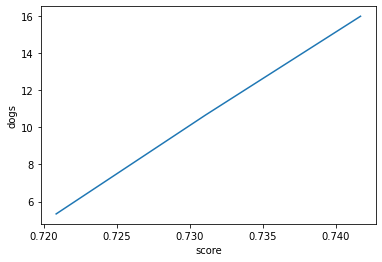

In [ ]:
data_all_read = '1'
Accurancy_pure(linear_model.RidgeCV(alphas = [60.2], fit_intercept = False), data_all_read)

26
[0.8533333333333334]
[0.7254166666666667]
16
[0.8533333333333334, 0.8576923076923085]
[0.7254166666666667, 0.7252724358974352]
26
[0.8533333333333334, 0.8576923076923085, 0.8596961063627719]
[0.7254166666666667, 0.7252724358974352, 0.7314316239316234]
16
[5.333333333333333, 10.666666666666666, 16.0]


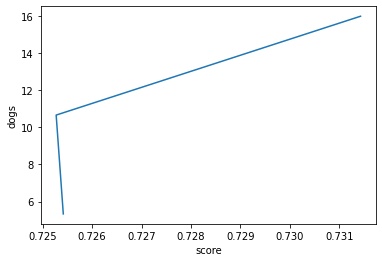

In [ ]:
data_all_read = '1'
Accurancy_pure(KNeighborsClassifier(n_neighbors=3), data_all_read)

26
[0.9266666666666666]
[0.695]
16
[0.9266666666666666, 0.9037179487179495]
[0.695, 0.7162179487179489]
26
[0.9266666666666666, 0.9037179487179495, 0.8867996201329518]
[0.695, 0.7162179487179489, 0.731923076923077]
16
[5.333333333333333, 10.666666666666666, 16.0]


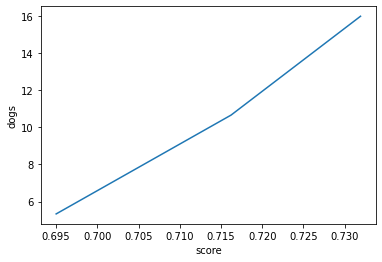

In [ ]:
data_all_read = '1'
Accurancy_pure(linear_model.LinearRegression(), data_all_read)

In [ ]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

def Accurancy_experiment_shedule(method, data):
  data_all_read = data
  data_all_read = pd.read_excel('cats_all.xlsx')

  schedule_step = round((data_all_read.shape[0] - 1) / 2 / 10)
  sample_size = round((data_all_read.shape[0] - 1) / 2)
  print(sample_size)
  training_score = []
  test_score = []
  help_avarage_training = []
  help_avarage_test = []
  i = 0
  x = sample_size
  scaler = StandardScaler()

  x = sample_size % 10
  for i in range(schedule_step): 
    x += 10
    for j in range(150):
      data_all = data_all_read
      data_all = shuffle(data_all)
      Y = data_all['Болен или нет']
      Y_training = Y[:x]
      Y_test = Y[x:x+x]
      data_all = data_all.drop(columns=['Болен или нет'])
      data_all = data_all.drop(columns=['Гемоглобин (Hgb)'])
      data_training = data_all[:x]
      sel = VarianceThreshold()
      data_training = sel.fit_transform(data_training)
      data_test = data_all[x:x+x]
      data_test = sel.fit_transform(data_test)


      clf_poly = method

      clf_poly.fit(data_training, Y_training)
      pred_poly = clf_poly.predict(data_training)
      new_pred_poly = []
      for j in pred_poly:
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)
      scaler_poly = accuracy_score(Y_training, new_pred_poly)
      help_avarage_training.append(scaler_poly)

      pred_poly = clf_poly.predict(data_test)
      new_pred_poly = []
      for j in pred_poly:
        if j <= 0.5:
          j = 0
        else: 
          j = 1
        new_pred_poly.append(j)

      scaler_poly = accuracy_score(Y_test, new_pred_poly)
      help_avarage_test.append(scaler_poly)

    s_training = sum(help_avarage_training)
    l_training = len(help_avarage_training)
    avarage_training = s_training / l_training
    training_score.append(avarage_training)

    s_test = sum(help_avarage_test)
    l_test = len(help_avarage_test)
    avarage_test = s_test / l_test
    test_score.append(avarage_test)

  Y_array = []
  x = 0
  one_slice = len(Y_test) / len(test_score)
  l_test = len(test_score)
  for i in range(1, l_test+1):
    x = one_slice * i
    Y_array.append(x)


  # Feature importance by SHAP value on training data
  data_training = pd.read_excel('cats_out.xlsx')
  explainer = shap.LinearExplainer(clf_poly, data_training)
  shap_values = explainer.shap_values(data_training)
  shap.summary_plot(shap_values, data_training)


26


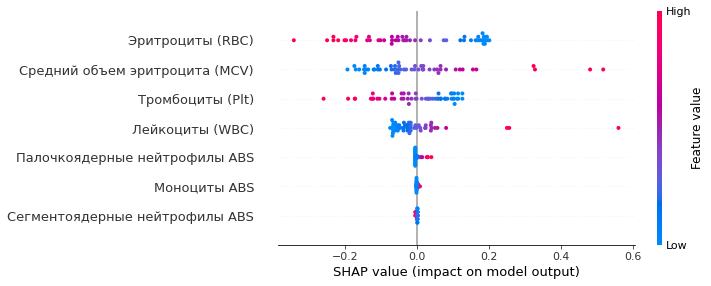

In [ ]:
data = '1'
Accurancy_experiment_shedule(linear_model.RidgeCV(alphas = [60.2], fit_intercept = False), data)